In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
duplicate_prospect_ID = data.duplicated(subset = 'Prospect ID')
print (sum(duplicate_prospect_ID) == 0)

True


In [7]:
duplicate_LeadNo = data.duplicated(subset = 'Lead Number')
print(sum(duplicate_LeadNo) == 0)

True


In [8]:
##EDA
#Data cleaning

In [9]:
data .drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [11]:
data = data.replace('Select', np.nan)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [14]:
data.isnull().sum().sum()

54419

In [15]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [17]:
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [18]:
columns =data.columns

for i in columns:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [19]:
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [21]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [30]:
data.drop('Country',1,inplace=True)

In [31]:
# Checking if Country in present in the data column

"Country" in data.columns

False

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [34]:
##Checking the City Column

data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
# Checking for the most frequest value in City 
data['City'].mode()

0    Mumbai
Name: City, dtype: object

In [36]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [42]:
#checking Specialization column

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [43]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

In [46]:
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [49]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [50]:
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [51]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [52]:
#Value counts after imputation
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
#Ratio of categories after imputation
data['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [54]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [55]:
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [56]:
data ['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [57]:
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [58]:
data.drop('What matters most to you in choosing a course',1,inplace=True)

In [59]:
#Rechecking data after removing the variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [60]:
#checking value counts of  variable 'Tag'
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [61]:
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

In [62]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [63]:
# Rechecking the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [64]:
# Checking the null values in the data
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [65]:
#checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [66]:
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')


In [67]:
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                 

In [68]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [69]:
data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [70]:
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

In [71]:
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [72]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [73]:
# Recheck the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [74]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [75]:
#Droping NA values
data = data.dropna()

In [76]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [77]:
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [78]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [79]:
# Ratio of the Do Not Email

data['Do Not Email'].value_counts(dropna=False, normalize = True)*100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

In [80]:
Check_cat_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [81]:
for i in Check_cat_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("-----------------------------------------------------------")

Search
No     9089
Yes      14
Name: Search, dtype: int64
-----------------------------------------------------------
Magazine
No    9103
Name: Magazine, dtype: int64
-----------------------------------------------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
-----------------------------------------------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
-----------------------------------------------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
-----------------------------------------------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
-----------------------------------------------------------
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
-----------------------------------------------------------
Receive More Updates About Our Courses
No    9103
Name: Receive Mor

In [82]:
data.drop(Check_cat_var,1, inplace=True)

In [83]:
#checking value counts of last Notable Activity
data ['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [84]:
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

In [85]:
#Count of categories under Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [86]:
# Checking the ratio of the Notable Activity
data['Last Notable Activity'].value_counts(normalize = True)* 100

Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Other_Notable_activity      1.757662
Name: Last Notable Activity, dtype: float64

In [87]:
#Checking the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [88]:
data['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [89]:
data['Converted'].value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

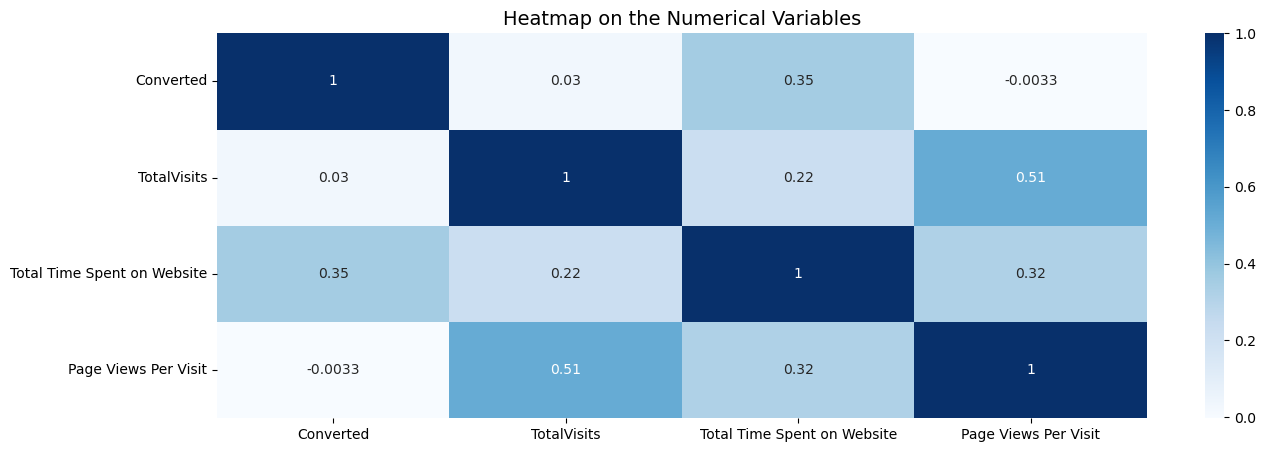

In [90]:
#Setting the frame
plt.figure(figsize=(15,5))

# heatmap
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.title("Heatmap on the Numerical Variables",fontsize=14)
plt.show()


In [91]:
# Analysing the Total Time Spent on Website variable
data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

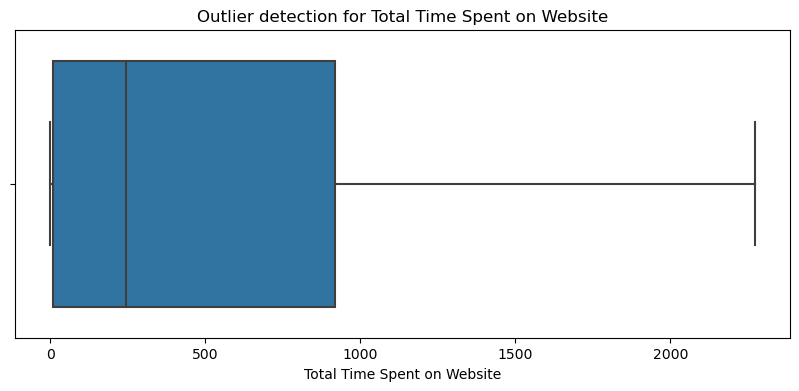

Median of "Total Time Spent on Website" is  244.0


In [92]:
#Outlier Detection of numeric variable using boxplot

plt.figure(figsize=(10,4))

sns.boxplot(x=data['Total Time Spent on Website'])

plt.title('Outlier detection for Total Time Spent on Website')
plt.show()

print ('Median of "Total Time Spent on Website" is ', data['Total Time Spent on Website'].median())

In [93]:
# Analysing the Total Time Spent on Website variable
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

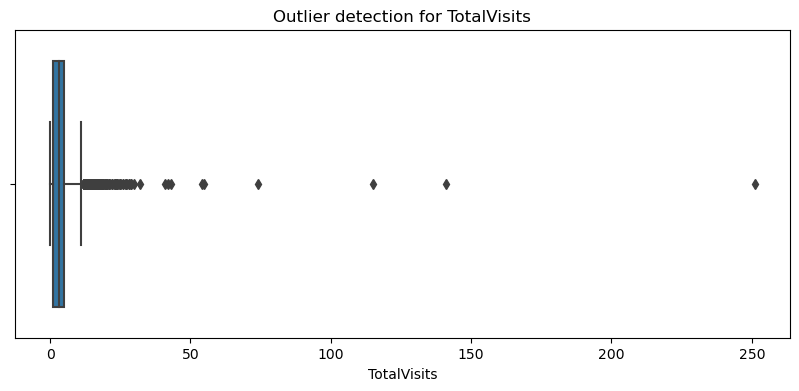

Median of TotalVisits is 3.0


In [94]:
#Setting the figure

plt.figure(figsize=(10,4))

sns.boxplot(x=data['TotalVisits'])

## Formatting the figure
plt.title('Outlier detection for TotalVisits')
plt.show()

print ('Median of TotalVisits is', data['TotalVisits'].median())

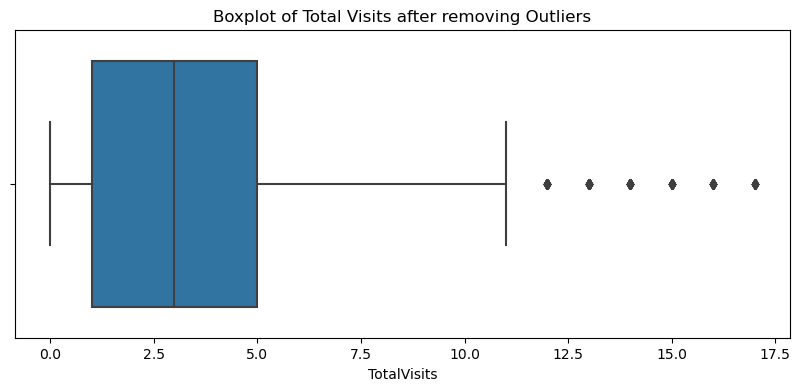

In [95]:
#Removing the Oultiers from the data

plt.figure(figsize=(10,4))

Q3 = data['TotalVisits'].quantile(0.99)

data = data[(data['TotalVisits'] <= Q3)]

Q1 = data['TotalVisits'].quantile(0.01)

data = data[(data['TotalVisits'] >= Q1)]

sns.boxplot(x=data['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [96]:
data.shape

(9020, 15)

In [97]:
#Analysing Page Views Per Visit

data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

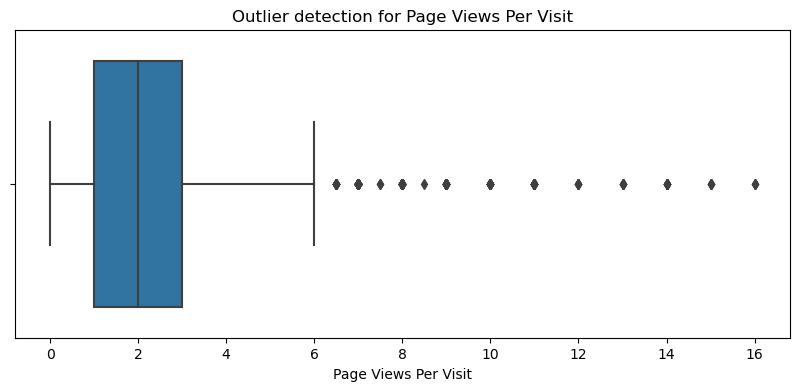

Median of Page Views Per Visit is 2.0


In [98]:
#Boxplot for  Page Views Per Visit

plt.figure(figsize=(10,4))

sns.boxplot(x=data['Page Views Per Visit'])

## Formatting the figure
plt.title('Outlier detection for Page Views Per Visit')
plt.show()

print ('Median of Page Views Per Visit is', data['Page Views Per Visit'].median())

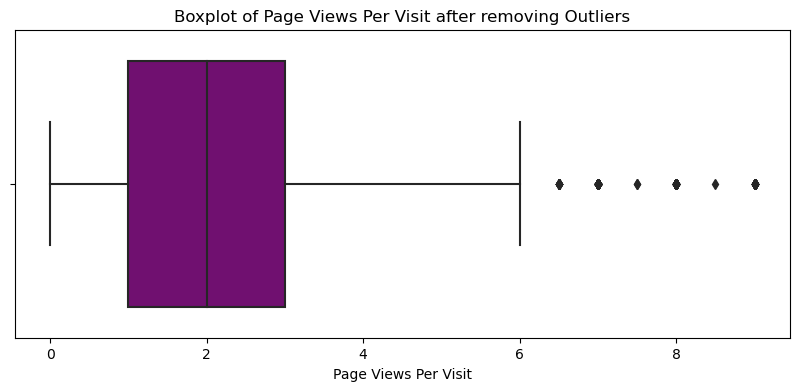

In [99]:
plt.figure(figsize=(10,4))

Q3 = data['Page Views Per Visit'].quantile(0.99)

data = data[(data['Page Views Per Visit'] <= Q3)]

Q1 = data['Page Views Per Visit'].quantile(0.01)

data = data[(data['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=data['Page Views Per Visit'],color = "purple")
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()

In [100]:
#Checking on the shape of the dataset 
data.shape

(8953, 15)

In [101]:
# Checking the total null values inside the data
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [102]:
###creat dummy variables
categorical_vals= data.select_dtypes(include=['object']).columns
categorical_vals


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [103]:
for i in categorical_vals:
    print(i)
    print(data[i].value_counts())
    print(" ")

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
 
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
 
Do Not Email
No     8256
Yes     697
Name: Do Not Email, dtype: int64
 
Do Not Call
No     8951
Yes       2
Name: Do Not Call, dtype: int64
 
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: Last Activity, dtype: int64
 
Specialization
Management_Specia

In [104]:
map_var =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
data[map_var] = data[map_var].apply(binary_map)

In [105]:
# Checking if the mapping has gone through

data[map_var].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [106]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [107]:
##adding dummy variables to specialization data
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [108]:
##adding dummy variables to lead score data
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [109]:
##adding dummy variables to last activity data
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [110]:
##adding dummy variables to last notable activity data
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [111]:
##adding dummy variables to last notable activity data
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [112]:
#dropping the original columns after dummy variable creation

data.drop(categorical_vals,1,inplace = True)

In [113]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

In [115]:
##Model Building: Logistic Regression
from sklearn.model_selection import train_test_split

y = data['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [116]:
# Independent Variables
X=data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [117]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [118]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,2.0,393,2.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [119]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,3.0,252,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [120]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [121]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [123]:
X_train.shape

(6267, 56)

In [124]:
y_train.shape

(6267,)

In [125]:
X_test.shape

(2686, 56)

In [126]:
y_test.shape

(2686,)

In [127]:
##Scaling of Data using Standard Scaler from SciKit Learn
#Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical cols for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [128]:
##Building Logistic Regression using Stats Model & RFE:
# Importing Statsmodels
import statsmodels.api as sm

In [135]:
from sklearn.linear_model import LogisticRegression

#Creating an instance of Logistic Regression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg)    
rfe = rfe.fit(X_train, y_train)

In [136]:
#printing the Output 
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [137]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('What is your current occupation_Housewife', False, 18),
 ('What is your current occupation_Other', False, 21),
 ('What is your current occupation_Student', False, 10),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 9),
 ('City_Other Cities of Maharashtra', False, 24),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 25),
 ('City_Tier II Cities', False, 15),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 26),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_International Business', False, 28)

In [138]:
# checking the rfe Supported columns
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       '

In [139]:
# listing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Notable 

In [140]:
#Model building

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.3
Date:                Wed, 20 Dec 2023   Deviance:                       2378.5
Time:                        18:26:48   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3377      0.131     -2.580      0.010      -0.594      -0.081
Total Time Spent on Website                              1.0924      0.062     17.517      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7507      0.154     -4.885      0.000      -1.052      -0.449
Lead Origin_Lead Add Form                                1.6320      1.012      1.612      0.107      -0.352       3.616
What is your current occupation_Working Professional     0.9837      0.416      2.363      0.018       0.168       1.800
Specialization_Banking, Investment And Insurance         0.4828      0.304      1.587      0.112      -0.113       1.079
Specialization_Travel and Tourism                       -0.8747      0.479     -1.824      0.068      -1.814       0.065
Lead Source_Direct Traffic                              -1.1110      0.224     -4.971      0.000      -1.549      -0.673
Lead Source_Google                                      -0.8096      0.179     -4.516      0.000      -1.161      -0.458
Lead Source_Organic Search                              -0.8800      0.216     -4.076      0.000      -1.303      -0.457
Lead Source_Reference                                   -1.0302      1.122     -0.918      0.359      -3.229       1.169
Lead Source_Referral Sites                              -1.2366      0.486     -2.542      0.011      -2.190      -0.283
Lead Source_Welingak Website                             3.3542      1.432      2.342      0.019       0.547       6.162
Last Activity_Converted to Lead                         -0.7695      0.385     -1.998      0.046      -1.524      -0.015
Last Activity_Email Bounced                             -1.2449      0.478     -2.604      0.009      -2.182      -0.308
Last Activity_Olark Chat Conversation                   -1.2412      0.315     -3.937      0.000      -1.859      -0.623
Last Activity_Page Visited on Website                   -0.7130      0.269     -2.654      0.008      -1.240      -0.186
Last Activity_SMS Sent                                   0.8429      0.261      3.226      0.001       0.331       1.355
Last Notable Activity_Email Link Clicked                -1.3680      0.478     -2.863      0.004      -2.305      -0.431
Last Notable Activity_Modified                          -0.8591      0.190     -4.531      0.000      -1.231      -0.487
Last Notable Activity_Olark Chat Conversation           -1.0372      0.576     -1.801      0.072      -2.166       0.092
Last Notable Activity_SMS Sent                           1.3145      0.289      4.542      0.000       0.747       1.882
Tags_Busy                                                0

In [141]:
#Model building

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.3
Date:                Wed, 20 Dec 2023   Deviance:                       2378.5
Time:                        18:27:11   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3377      0.131     -2.580      0.010      -0.594      -0.081
Total Time Spent on Website                              1.0924      0.062     17.517      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7507      0.154     -4.885      0.000      -1.052      -0.449
Lead Origin_Lead Add Form                                1.6320      1.012      1.612      0.107      -0.352       3.616
What is your current occupation_Working Professional     0.9837      0.416      2.363      0.018       0.168       1.800
Specialization_Banking, Investment And Insurance         0.4828      0.304      1.587      0.112      -0.113       1.079
Specialization_Travel and Tourism                       -0.8747      0.479     -1.824      0.068      -1.814       0.065
Lead Source_Direct Traffic                              -1.1110      0.224     -4.971      0.000      -1.549      -0.673
Lead Source_Google                                      -0.8096      0.179     -4.516      0.000      -1.161      -0.458
Lead Source_Organic Search                              -0.8800      0.216     -4.076      0.000      -1.303      -0.457
Lead Source_Reference                                   -1.0302      1.122     -0.918      0.359      -3.229       1.169
Lead Source_Referral Sites                              -1.2366      0.486     -2.542      0.011      -2.190      -0.283
Lead Source_Welingak Website                             3.3542      1.432      2.342      0.019       0.547       6.162
Last Activity_Converted to Lead                         -0.7695      0.385     -1.998      0.046      -1.524      -0.015
Last Activity_Email Bounced                             -1.2449      0.478     -2.604      0.009      -2.182      -0.308
Last Activity_Olark Chat Conversation                   -1.2412      0.315     -3.937      0.000      -1.859      -0.623
Last Activity_Page Visited on Website                   -0.7130      0.269     -2.654      0.008      -1.240      -0.186
Last Activity_SMS Sent                                   0.8429      0.261      3.226      0.001       0.331       1.355
Last Notable Activity_Email Link Clicked                -1.3680      0.478     -2.863      0.004      -2.305      -0.431
Last Notable Activity_Modified                          -0.8591      0.190     -4.531      0.000      -1.231      -0.487
Last Notable Activity_Olark Chat Conversation           -1.0372      0.576     -1.801      0.072      -2.166       0.092
Last Notable Activity_SMS Sent                           1.3145      0.289      4.542      0.000       0.747       1.882
Tags_Busy                                                0

In [142]:
#Model 2 after removing the Lead Source Referral Sites

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.3
Date:                Wed, 20 Dec 2023   Deviance:                       2378.5
Time:                        18:27:26   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3377      0.131     -2.580      0.010      -0.594      -0.081
Total Time Spent on Website                              1.0924      0.062     17.517      0.000       0.970       1.215
Lead Origin_Landing Page Submission                     -0.7507      0.154     -4.885      0.000      -1.052      -0.449
Lead Origin_Lead Add Form                                1.6320      1.012      1.612      0.107      -0.352       3.616
What is your current occupation_Working Professional     0.9837      0.416      2.363      0.018       0.168       1.800
Specialization_Banking, Investment And Insurance         0.4828      0.304      1.587      0.112      -0.113       1.079
Specialization_Travel and Tourism                       -0.8747      0.479     -1.824      0.068      -1.814       0.065
Lead Source_Direct Traffic                              -1.1110      0.224     -4.971      0.000      -1.549      -0.673
Lead Source_Google                                      -0.8096      0.179     -4.516      0.000      -1.161      -0.458
Lead Source_Organic Search                              -0.8800      0.216     -4.076      0.000      -1.303      -0.457
Lead Source_Reference                                   -1.0302      1.122     -0.918      0.359      -3.229       1.169
Lead Source_Referral Sites                              -1.2366      0.486     -2.542      0.011      -2.190      -0.283
Lead Source_Welingak Website                             3.3542      1.432      2.342      0.019       0.547       6.162
Last Activity_Converted to Lead                         -0.7695      0.385     -1.998      0.046      -1.524      -0.015
Last Activity_Email Bounced                             -1.2449      0.478     -2.604      0.009      -2.182      -0.308
Last Activity_Olark Chat Conversation                   -1.2412      0.315     -3.937      0.000      -1.859      -0.623
Last Activity_Page Visited on Website                   -0.7130      0.269     -2.654      0.008      -1.240      -0.186
Last Activity_SMS Sent                                   0.8429      0.261      3.226      0.001       0.331       1.355
Last Notable Activity_Email Link Clicked                -1.3680      0.478     -2.863      0.004      -2.305      -0.431
Last Notable Activity_Modified                          -0.8591      0.190     -4.531      0.000      -1.231      -0.487
Last Notable Activity_Olark Chat Conversation           -1.0372      0.576     -1.801      0.072      -2.166       0.092
Last Notable Activity_SMS Sent                           1.3145      0.289      4.542      0.000       0.747       1.882
Tags_Busy                                                0

In [143]:
#Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.60
9,Lead Source_Reference,12.66
16,Last Activity_SMS Sent,7.59
20,Last Notable Activity_SMS Sent,7.40
1,Lead Origin_Landing Page Submission,4.69
11,Lead Source_Welingak Website,4.67
6,Lead Source_Direct Traffic,3.95
18,Last Notable Activity_Modified,3.62
7,Lead Source_Google,2.83
14,Last Activity_Olark Chat Conversation,2.21


In [145]:
#Removing variable with high VIF Value

rfe_support_col = rfe_support_col.drop('Last Notable Activity_SMS Sent',1)

In [146]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.7
Date:                Wed, 20 Dec 2023   Deviance:                       2399.3
Time:                        18:28:45   Pearson chi2:                 8.12e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6116
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2528      0.128     -1.969      0.049      -0.505      -0.001
Total Time Spent on Website                              1.0939      0.062     17.638      0.000       0.972       1.215
Lead Origin_Landing Page Submission                     -0.7471      0.152     -4.907      0.000      -1.046      -0.449
Lead Origin_Lead Add Form                                1.7623      1.025      1.720      0.085      -0.246       3.770
What is your current occupation_Working Professional     0.9759      0.418      2.335      0.020       0.157       1.795
Specialization_Banking, Investment And Insurance         0.4490      0.305      1.472      0.141      -0.149       1.047
Specialization_Travel and Tourism                       -0.9266      0.479     -1.934      0.053      -1.866       0.013
Lead Source_Direct Traffic                              -1.1251      0.222     -5.077      0.000      -1.559      -0.691
Lead Source_Google                                      -0.8219      0.178     -4.629      0.000      -1.170      -0.474
Lead Source_Organic Search                              -0.8953      0.214     -4.189      0.000      -1.314      -0.476
Lead Source_Reference                                   -1.1807      1.136     -1.040      0.299      -3.407       1.045
Lead Source_Referral Sites                              -1.2426      0.485     -2.564      0.010      -2.192      -0.293
Lead Source_Welingak Website                             3.1918      1.442      2.214      0.027       0.366       6.017
Last Activity_Converted to Lead                         -0.2827      0.377     -0.749      0.454      -1.022       0.457
Last Activity_Email Bounced                             -0.9898      0.479     -2.067      0.039      -1.928      -0.051
Last Activity_Olark Chat Conversation                   -0.7367      0.304     -2.425      0.015      -1.332      -0.141
Last Activity_Page Visited on Website                   -0.5832      0.266     -2.196      0.028      -1.104      -0.063
Last Activity_SMS Sent                                   1.8946      0.124     15.296      0.000       1.652       2.137
Last Notable Activity_Email Link Clicked                -1.4883      0.485     -3.070      0.002      -2.438      -0.538
Last Notable Activity_Modified                          -1.4703      0.146    -10.082      0.000      -1.756      -1.184
Last Notable Activity_Olark Chat Conversation           -1.6393      0.568     -2.887      0.004      -2.752      -0.526
Tags_Busy                                                0.7749      0.231      3.351      0.001       0.322       1.228
Tags_Closed by Horizzon                                  7

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,16.59
9,Lead Source_Reference,12.66
1,Lead Origin_Landing Page Submission,4.69
11,Lead Source_Welingak Website,4.67
6,Lead Source_Direct Traffic,3.95
7,Lead Source_Google,2.82
18,Last Notable Activity_Modified,2.55
26,Tags_Will revert after reading the email,2.05
14,Last Activity_Olark Chat Conversation,1.95
8,Lead Source_Organic Search,1.73


In [148]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.231536
4696    0.027493
3274    0.347584
2164    0.003665
1667    0.993247
7024    0.230248
8018    0.027043
778     0.101255
6942    0.003718
4440    0.076707
dtype: float64

In [149]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23153556, 0.02749266, 0.34758355, 0.00366545, 0.99324721,
       0.23024797, 0.02704318, 0.10125461, 0.00371775, 0.07670733])

In [150]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.231536,9196
1,0,0.027493,4696
2,0,0.347584,3274
3,0,0.003665,2164
4,1,0.993247,1667


In [151]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.231536,9196,0
1,0,0.027493,4696,0
2,0,0.347584,3274,0
3,0,0.003665,2164,0
4,1,0.993247,1667,1


In [152]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3724  158]
 [ 283 2102]]


In [153]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9296314025849689


In [154]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [155]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2102
True negatives is  3724
False positives is  158
False negatives is  283


In [156]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  88.13 %


In [157]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  95.93 %


In [158]:
# Calculate False Postive Rate
#In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.

print(FP/ float(TN+FP))

0.04070066975785677


In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.9300884955752212


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9293735962066384


In [161]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

<Figure size 1500x1500 with 0 Axes>

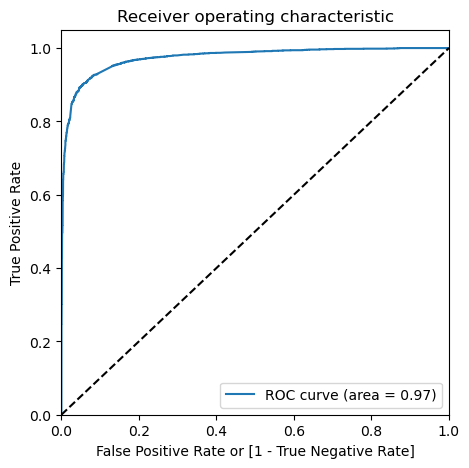

In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

In [163]:
##Finding cutoff point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.231536,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.027493,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.347584,3274,0,1,1,1,1,0,0,0,0,0,0
3,0,0.003665,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.993247,1667,1,1,1,1,1,1,1,1,1,1,1


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.850646  0.972746  0.775631
0.2   0.2  0.895963  0.953459  0.860639
0.3   0.3  0.922132  0.919078  0.924008
0.4   0.4  0.928514  0.900210  0.945904
0.5   0.5  0.929631  0.881342  0.959299
0.6   0.6  0.926440  0.859119  0.967800
0.7   0.7  0.912717  0.805451  0.978619
0.8   0.8  0.905697  0.775681  0.985574
0.9   0.9  0.887506  0.718658  0.991242


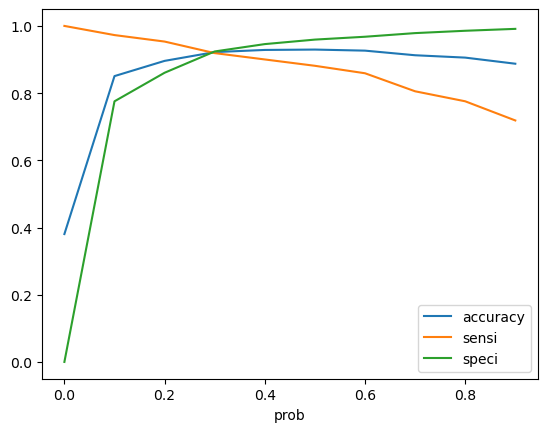

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [166]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.231536,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.027493,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.347584,3274,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.003665,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.993247,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [167]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.231536,9196,0,23
1,0,0.027493,4696,0,3
2,0,0.347584,3274,1,35
3,0,0.003665,2164,0,0
4,1,0.993247,1667,1,99


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9221318014999202

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3587,  295],
       [ 193, 2192]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.919077568134172

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.9240082431736218

In [173]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07599175682637815


In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.881383192601528


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.948941798941799


In [176]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3587,  295],
       [ 193, 2192]], dtype=int64)

In [177]:
#### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.881383192601528

In [178]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.919077568134172

In [179]:
from sklearn.metrics import precision_score, recall_score


In [180]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)


0.881383192601528

In [181]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.919077568134172

In [182]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

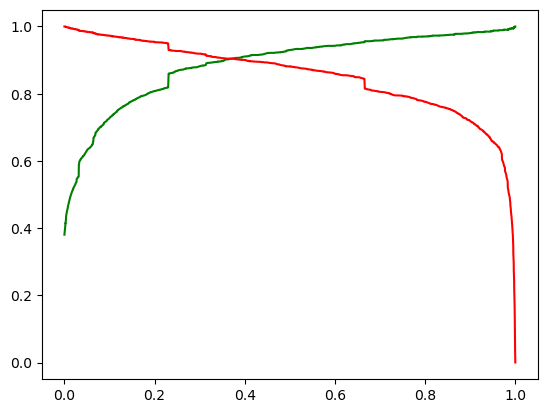

In [184]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [185]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [215]:
X_test = X_test[num_cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7681,0.575687,-0.311318,0.092860
984,-0.090676,-0.550262,0.356568
8135,-0.423857,0.812462,-0.170849
6915,0.242505,-0.628665,-0.170849
2712,-0.090676,-0.421456,0.356568
